### Compare the TMDs of the different translations

In [1]:
import glob
import os

import joblib
import pandas as pd

In [2]:
result_fpaths = glob.glob("../Output/*.pkl")

In [3]:
all_dfs = []
for cur_fpath in result_fpaths:
    cur_df = pd.read_pickle(cur_fpath)
    cur_df['fname'] = os.path.basename(cur_fpath)
    all_dfs.append(cur_df)

In [4]:
full_df = pd.concat(all_dfs)

In [5]:
full_df.reset_index(inplace=True)

In [6]:
# Get just the id of the text that was aligned to de_tge
full_df['tr_id'] = full_df['fname'].apply(lambda x: x.split(".")[1])
# And now we can drop the fname
full_df.drop(columns=['fname'], inplace=True)

In [7]:
full_df

,chapter,wmd,sent_count,mean,tr_id
0,ch01,706.839041,625,1.130942,en_aveling
1,ch02,135.896160,119,1.141985,en_aveling
2,ch03,707.765809,621,1.139719,en_aveling
3,ch04,435.702259,367,1.187200,en_aveling
4,ch05,163.993952,147,1.115605,en_aveling
...,...,...,...,...,...
127,ch29,27.889255,23,1.212576,zh_morg
128,ch30,52.724204,46,1.146178,zh_morg
129,ch31,169.871628,145,1.171528,zh_morg
130,ch32,41.497848,36,1.152718,zh_morg


In [8]:
full_df

,chapter,wmd,sent_count,mean,tr_id
0,ch01,706.839041,625,1.130942,en_aveling
1,ch02,135.896160,119,1.141985,en_aveling
2,ch03,707.765809,621,1.139719,en_aveling
3,ch04,435.702259,367,1.187200,en_aveling
4,ch05,163.993952,147,1.115605,en_aveling
...,...,...,...,...,...
127,ch29,27.889255,23,1.212576,zh_morg
128,ch30,52.724204,46,1.146178,zh_morg
129,ch31,169.871628,145,1.171528,zh_morg
130,ch32,41.497848,36,1.152718,zh_morg


Here we transform to the chapter-by-chapter comparison format

In [9]:
tmd_df = full_df.pivot(index='chapter', columns=['tr_id'], values='mean')

In [10]:
tmd_df

tr_id,en_aveling,en_fowkes,ru_morg,zh_morg
chapter,,,,
ch01,1.130942,1.121407,0.957840,1.170668
ch02,1.141985,1.118698,0.977748,1.167632
ch03,1.139719,1.123041,0.969497,1.164737
ch04,1.187200,1.191923,0.999243,1.246643
ch05,1.115605,1.097023,0.955909,1.169268
ch06,1.124971,1.114503,0.966722,1.146865
ch07,1.127856,1.111027,0.947608,1.158669
ch08,1.106068,1.100187,0.946214,1.151963
ch09,1.132576,1.125736,0.966237,1.182677


In [16]:
tmd_df.mean(axis=0)

tr_id
en_aveling    1.128425
en_fowkes     1.121938
ru_morg       0.966975
zh_morg       1.154967
dtype: float64

<AxesSubplot:xlabel='chapter'>

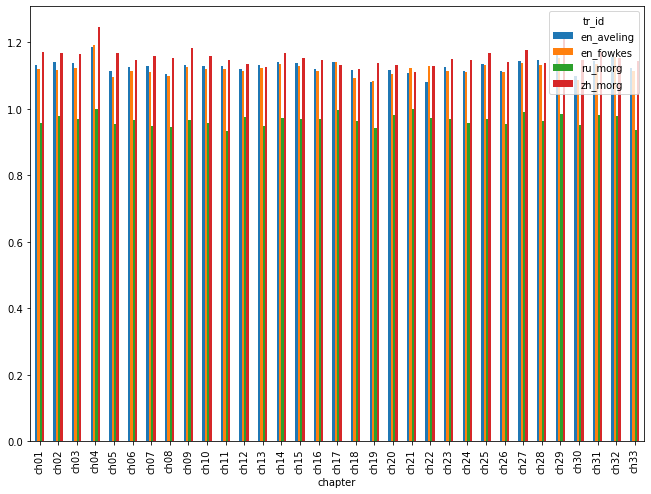

In [12]:
tmd_df.plot(kind='bar', figsize=(11,8)) #, legend=None)

In [28]:
pa_chs = ['ch26','ch27','ch28','ch29','ch30','ch31','ch32','ch33']

In [29]:
pa_df = tmd_df.loc[pa_chs].copy()

In [32]:
npa_df = tmd_df.loc[[ch for ch in tmd_df.index if ch not in pa_chs]].copy()

In [36]:
pa_df.mean()

tr_id
en_aveling    1.136619
en_fowkes     1.128415
zh_morg       1.160748
dtype: float64

In [35]:
npa_df.mean()

tr_id
en_aveling    1.125803
en_fowkes     1.119865
zh_morg       1.153118
dtype: float64

In [37]:
pa_df.mean() / npa_df.mean()

tr_id
en_aveling    1.009607
en_fowkes     1.007634
zh_morg       1.006617
dtype: float64

<AxesSubplot:xlabel='chapter'>

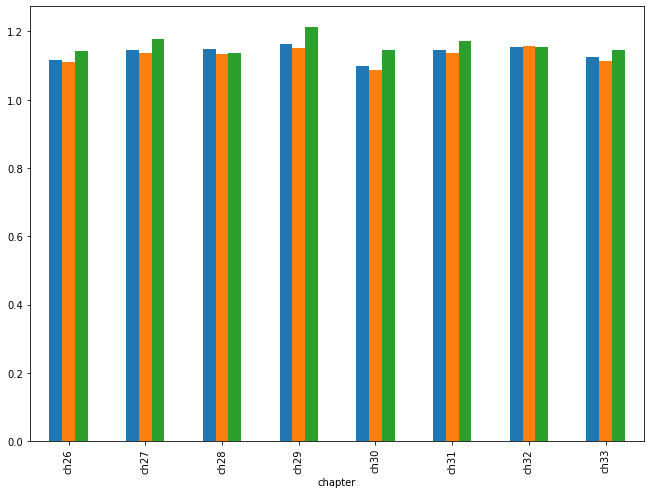

In [33]:
pa_df.plot(kind='bar', figsize=(11,8), legend=None)

In [23]:
tmd_df.mean()

tr_id
en_aveling    1.128425
en_fowkes     1.121938
zh_morg       1.154967
dtype: float64

In [11]:
tmd_df.loc['ch07',]

tr_id
en_aveling    322.566802
en_fowkes     329.974969
zh_morg       373.091260
Name: ch07, dtype: float64

In [12]:
tmd_df

tr_id,en_aveling,en_fowkes,zh_morg
chapter,,,
ch01,706.839041,693.029663,742.203475
ch02,135.896160,124.175460,135.445345
ch03,707.765809,680.562856,715.148235
ch04,435.702259,443.395434,467.490994
ch05,163.993952,153.583162,178.898005
ch06,133.871562,133.740309,143.358178
ch07,322.566802,329.974969,373.091260
ch08,159.273772,163.927924,172.794524
ch09,242.371257,249.913451,261.371512


In [13]:
tmd_df['zh_en'] = tmd_df['zh_morg'] / tmd_df['en_fowkes']

In [14]:
tmd_df

tr_id,en_aveling,en_fowkes,zh_morg,zh_en
chapter,,,,
ch01,706.839041,693.029663,742.203475,1.070955
ch02,135.896160,124.175460,135.445345,1.090758
ch03,707.765809,680.562856,715.148235,1.050819
ch04,435.702259,443.395434,467.490994,1.054343
ch05,163.993952,153.583162,178.898005,1.164828
ch06,133.871562,133.740309,143.358178,1.071915
ch07,322.566802,329.974969,373.091260,1.130665
ch08,159.273772,163.927924,172.794524,1.054088
ch09,242.371257,249.913451,261.371512,1.045848


In [15]:
tmd_df['zh_en'].argmax() # (ch05)

4

<AxesSubplot:xlabel='chapter'>

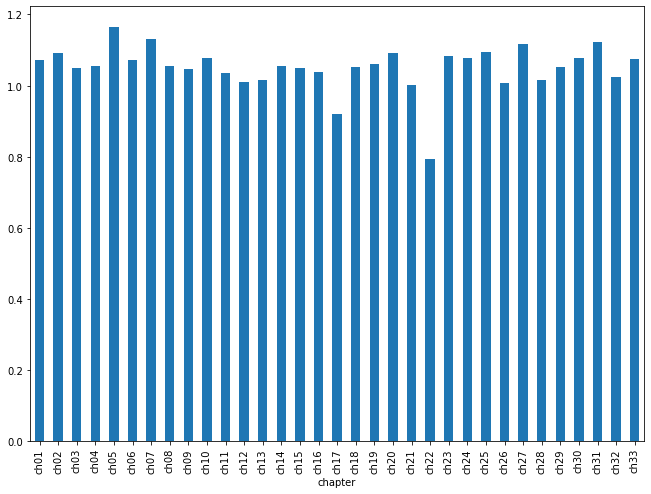

In [16]:
tmd_df['zh_en'].plot(kind='bar', figsize=(11,8))

In [17]:
# Trying with en-zh correction
en_zh_ratio = joblib.load("./lang_stats/en_zh_ratio.pkl")

In [18]:
en_zh_ratio

0.7885142967339772

In [20]:
tmd_df

tr_id,en_aveling,en_fowkes,zh_morg,zh_en
chapter,,,,
ch01,706.839041,693.029663,742.203475,1.070955
ch02,135.896160,124.175460,135.445345,1.090758
ch03,707.765809,680.562856,715.148235,1.050819
ch04,435.702259,443.395434,467.490994,1.054343
ch05,163.993952,153.583162,178.898005,1.164828
ch06,133.871562,133.740309,143.358178,1.071915
ch07,322.566802,329.974969,373.091260,1.130665
ch08,159.273772,163.927924,172.794524,1.054088
ch09,242.371257,249.913451,261.371512,1.045848


In [21]:
tmd_df['zh_corrected'] = tmd_df['zh_morg'] * en_zh_ratio

<AxesSubplot:xlabel='chapter'>

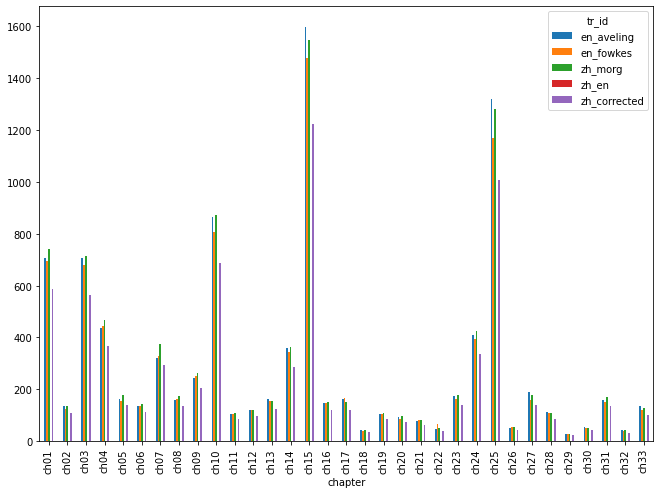

In [22]:
tmd_df.plot(kind='bar', figsize=(11,8))

### Now checking section-by-section

In [19]:
section_map = {

}